# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from numpy import log as ln
from math import cos, sin, sqrt, hypot
import numpy as np

eps = sys.float_info.epsilon

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def f1(x, y):
  return x**2 + y**2 - 2*x + 4*y + 3

def f2(x, y):
  return (2 + cos(x) - cos(y)**3)**2 + (sin(x) - 4 - sin(y)**3)**2

def f(x, y):
  return f1(x, y)**2 - f2(x, y)**2

def f_x(x, y, h=eps):
  return (f(x + h, y) - f(x, y)) / (2*h)

def f_y(x, y, h=eps):
  return (f(x, y + h) - f(x, y)) / (2*h)

def rev_grad(x, y):
  '''-gradF | x, y'''
  return (-f_x(x, y), -f_y(x, y))

def gss(a, b, f, eps=eps):
    '''golden section search'''
    while b - a > eps:
        x1 = a + 0.381966 * (b - a)
        x2 = a + 0.618034 * (b - a)
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    return a + (b - a) / 2

def gradient_descent(x0, y0):
  r = (x0, y0)
  a, b = 0, 1
  gn = rev_grad(*r)
  while abs(hypot(*gn)) > eps:
    gn = rev_grad(*r)
    F = lambda t: f(r[0] + t * gn[0], r[1] + t * gn[1])
    tn = gss(a, b, F)
    r = (r[0] + tn*gn[0], r[1] + tn*gn[1])
  return r


def chart(a, b, n, f=f):
  h = abs(b - a) / n
  x = a
  points = [[], []]
  while x <= b:
    y = f(x)
    points[0].append(x)
    points[1].append(y)
    x += h
  return points

# Task

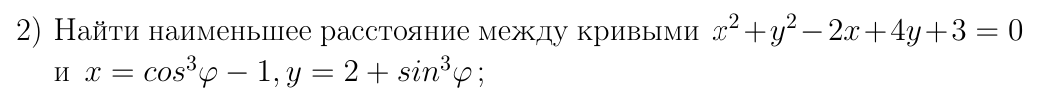

In [ ]:
r = (1, 1)
point = gradient_descent(r[0], r[1])
dist = lambda p, r: ((p[0] - r[0])**2 + (p[1] - r[1])**2)**.5
print("Наименьшее расстояние между кривыми в точке:", point)

Наименьшее расстояние между кривыми в точке: (0.5171458108808826, -4.674016362030747)


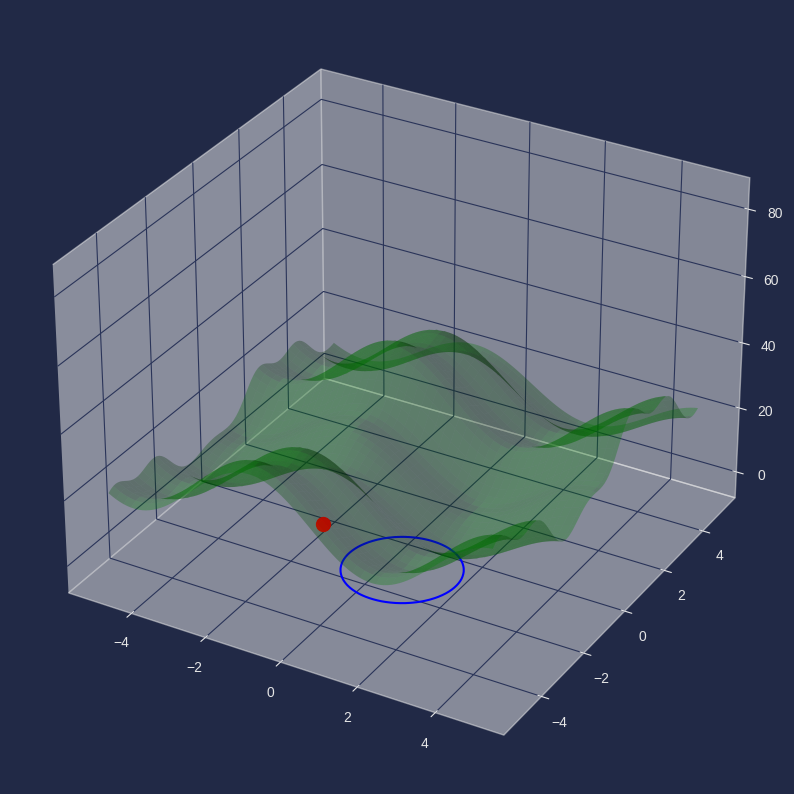

In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-5, 5, 100)
y1 = np.linspace(-5, 5, 100)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = X1**2 + Y1**2 - 2*X1 + 4*Y1 + 3
ax.contour(X1, Y1, Z1, [0], colors='b')

x2 = np.linspace(-5, 5, 100)
y2 = np.linspace(-5, 5, 100)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = (2 + np.cos(X2) - np.cos(Y2)**3)**2 + (np.sin(X2) - 4 - np.sin(Y2)**3)**2
ax.plot_surface(X2, Y2, Z2, color='g', alpha=0.3)

point_x = point[0]
point_y = point[1]
point_z = (2 + cos(point_x) - cos(point_y)**3)**2 + (sin(point_x) - 4 - sin(point_y)**3)**2
ax.scatter(point_x, point_y, point_z, color='r', s=100)

plt.show()

In [ ]:
print("Наименьшее расстояние между кривыми:", dist(r, point))

Наименьшее расстояние между кривыми: 5.694524549472283
